# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

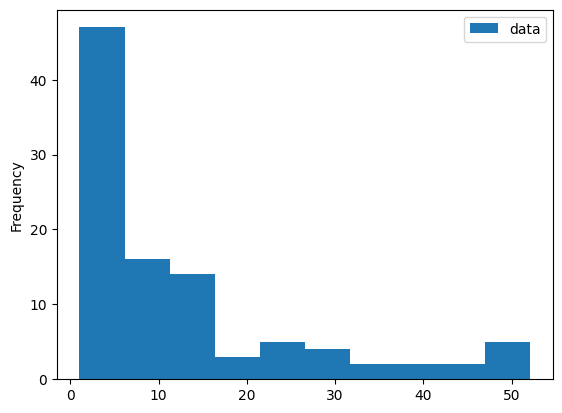

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

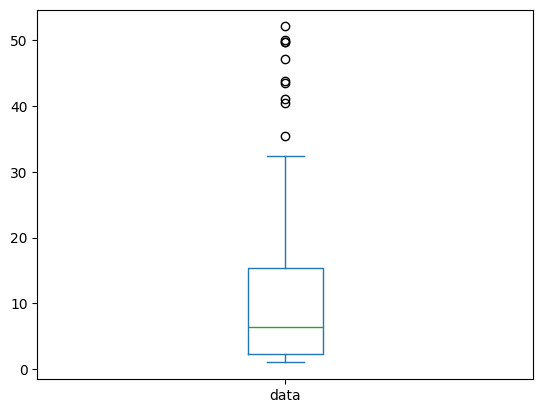

In [3]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import kagglehub
import os
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\luank\Documents\BU\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Download the latest version of the dataset
cybersecurity_data_path = kagglehub.dataset_download("teamincribo/cyber-security-attacks")
print("Path to dataset files:", cybersecurity_data_path)
# Construct the full cybersecurity_data_path to the CSV file (update the file name if necessary)
csv_file = os.path.join(cybersecurity_data_path, "cybersecurity_attacks.csv")
# Read the dataset into a DataFrame
cybersecurity_data = pd.read_csv(csv_file)

# Download the latest version of the dataset
unsw_data_path = kagglehub.dataset_download("dhoogla/unswnb15")
print("Path to dataset files:", unsw_data_path)
# Construct the full cybersecurity_data_path to the CSV file (update the file name if necessary)
csv_file = os.path.join(unsw_data_path, "UNSW_NB15_training-set.parquet")
# Read the dataset into a DataFrame
unsw_data = pd.read_parquet(csv_file)


100%|██████████| 5.03M/5.03M [00:00<00:00, 10.7MB/s]

Extracting files...


Path to dataset files: C:\Users\luank\.cache\kagglehub\datasets\teamincribo\cyber-security-attacks\versions\21
Path to dataset files: C:\Users\luank\.cache\kagglehub\datasets\dhoogla\unswnb15\versions\5



==== Cybersecurity Dataset ====



,mean,median,min,max,mode
Source Port,32970.36,32856.00,1027.00,65530.00,41341.00
Destination Port,33150.87,33004.50,1024.00,65535.00,7508.00
Packet Length,781.45,782.00,64.00,1500.00,1037.00
Anomaly Scores,50.11,50.34,0.00,100.00,15.39


c:\Users\luank\Documents\BU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\luank\Documents\BU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


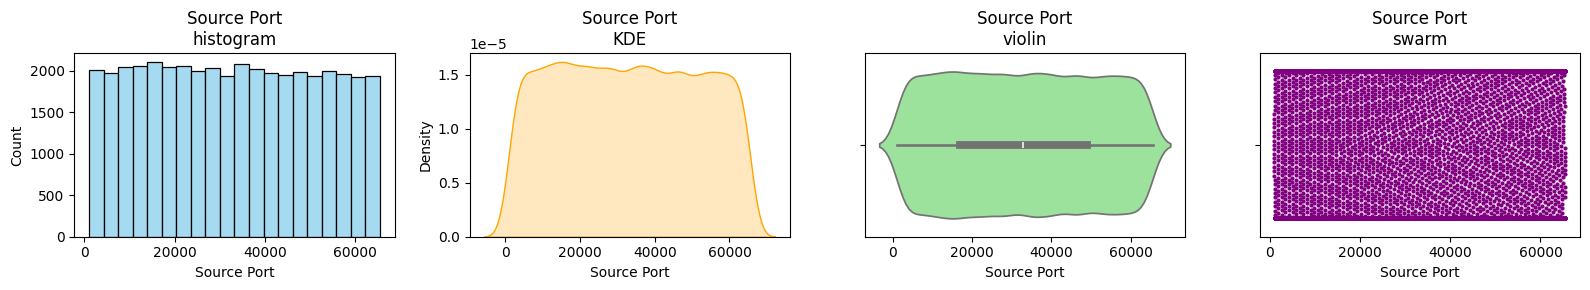

c:\Users\luank\Documents\BU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 34.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\luank\Documents\BU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 93.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


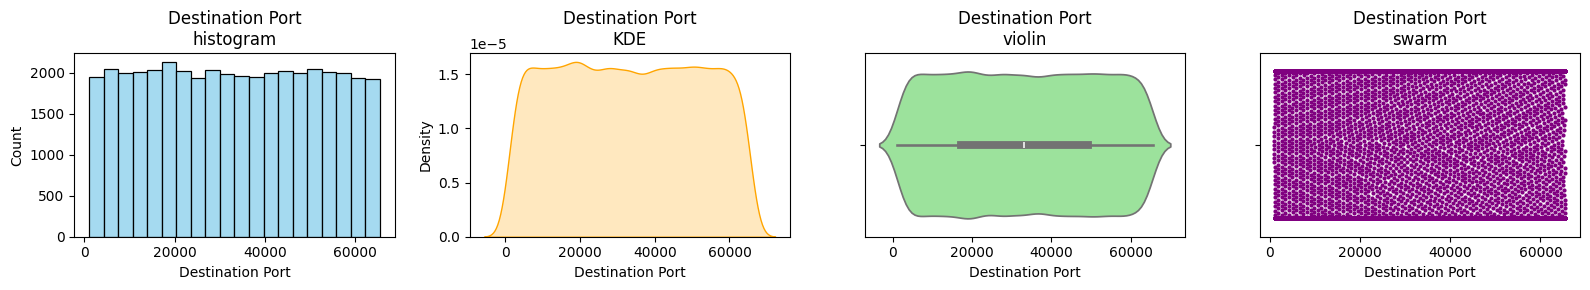

KeyboardInterrupt: 

In [ ]:
# …existing code above…

# Insert this as a new cell right below the homework instructions:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# put your two DataFrames into a dict for easy looping
datasets = {
    "Cybersecurity": cybersecurity_data,
    "UNSW_NB15": unsw_data
}

for name, df in datasets.items():
    print(f"\n==== {name} Dataset ====\n")
    
    # 1) Summary statistics
    num = df.select_dtypes(include="number")
    cat = df.select_dtypes(include="object")
    stats = num.agg(["mean", "median", "min", "max"]).T
    stats["mode"] = num.mode().iloc[0]
    display(stats.style.format("{:.2f}"))
    
    # 2) Numerical columns: hist, KDE, violin, swarm
    for col in num.columns:
        fig, axes = plt.subplots(1,4, figsize=(16,3))
        
        sns.histplot(df[col], bins=20, ax=axes[0], color="skyblue")
        axes[0].set_title(f"{col}\nhistogram")
        
        sns.kdeplot(df[col], fill=True, ax=axes[1], color="orange")
        axes[1].set_title(f"{col}\nKDE")
        
        sns.violinplot(x=df[col], ax=axes[2], color="lightgreen")
        axes[2].set_title(f"{col}\nviolin")
        
        sns.swarmplot(x=df[col], ax=axes[3], size=3, color="purple")
        axes[3].set_title(f"{col}\nswarm")
        
        plt.tight_layout()
        plt.show()
    
    # 3) Categorical columns: bar counts
    for col in cat.columns:
        counts = df[col].value_counts(dropna=False)
        plt.figure(figsize=(6,4))
        sns.barplot(x=counts.index, y=counts.values, palette="pastel")
        plt.title(f"{col} – value counts")
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

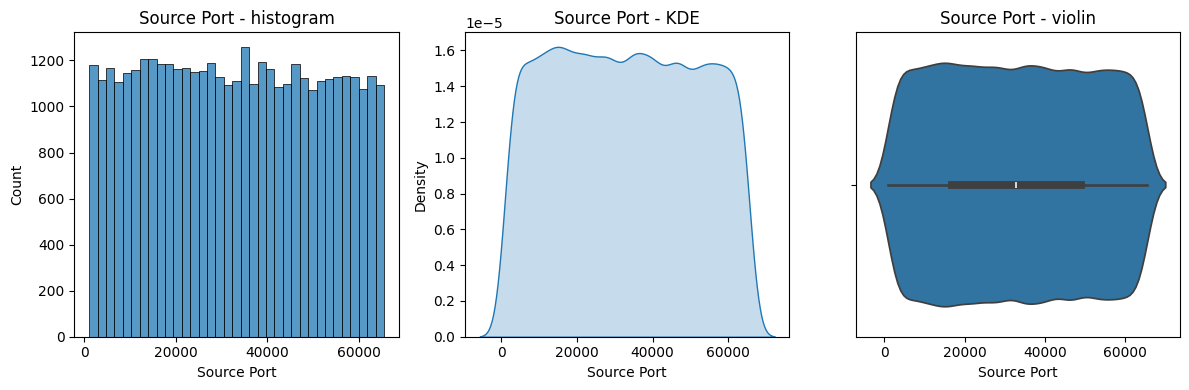

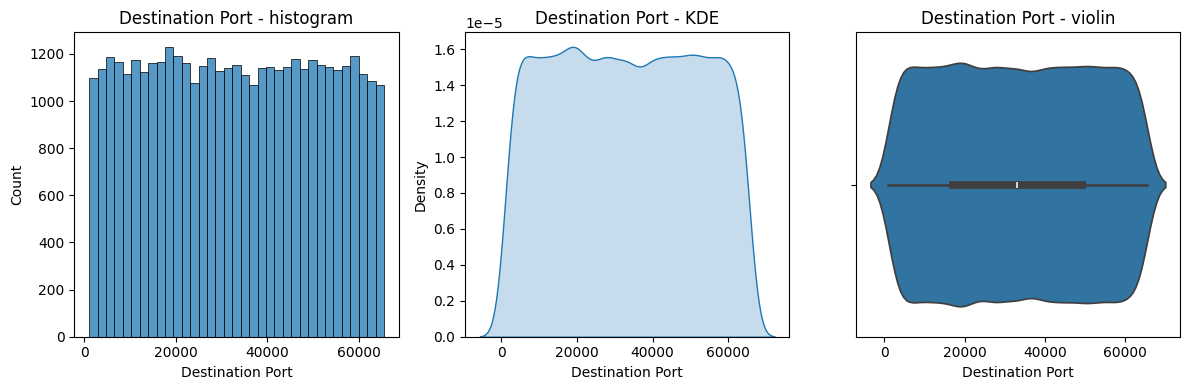

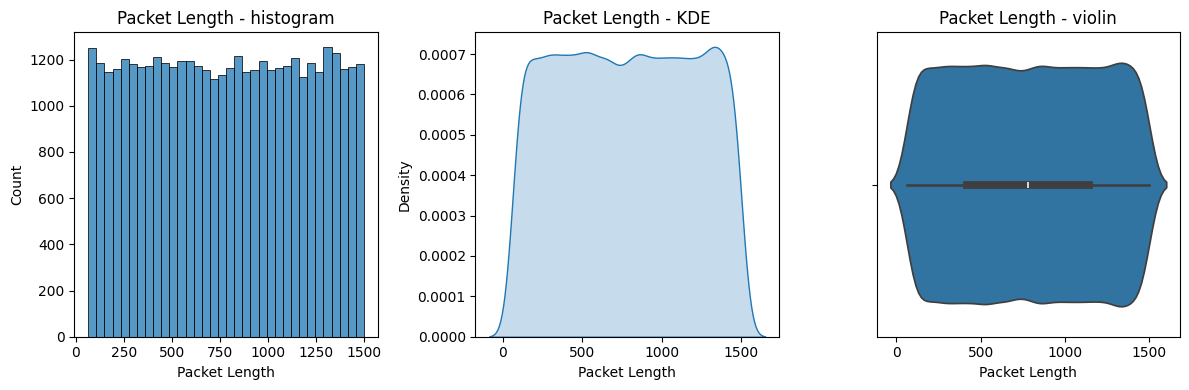

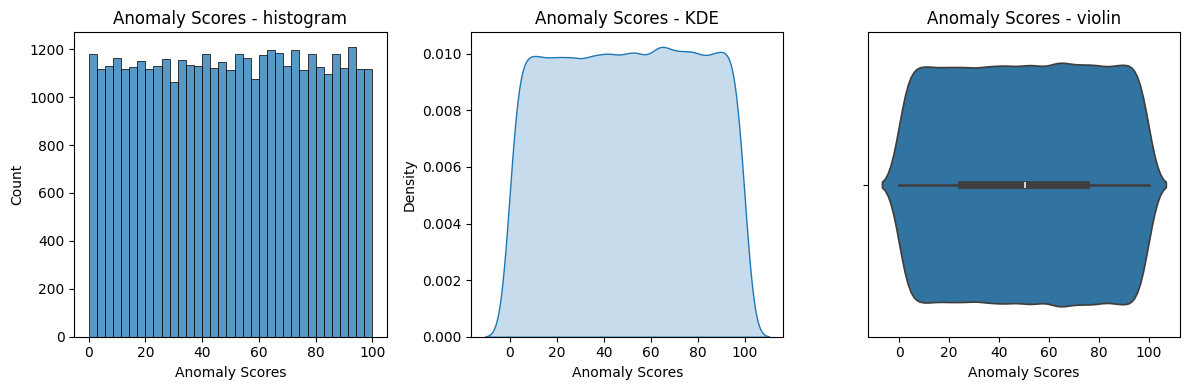

In [13]:
num_cols = cybersecurity_data.select_dtypes(include="number").columns

for col in num_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,3,1)
    sns.histplot(cybersecurity_data[col], kde=False)
    plt.title(f"{col} - histogram")

    plt.subplot(1,3,2)
    sns.kdeplot(cybersecurity_data[col], fill=True)
    plt.title(f"{col} - KDE")

    plt.subplot(1,3,3)
    sns.violinplot(x=cybersecurity_data[col])
    plt.title(f"{col} - violin")

    plt.tight_layout()
    plt.show()

In [14]:
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.swarmplot(x=cybersecurity_data[col], size=3)
    plt.title(f"{col} - swarm")
    plt.show()

c:\Users\luank\Documents\BU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 26.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\luank\Documents\BU\.venv\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 92.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


KeyboardInterrupt: 

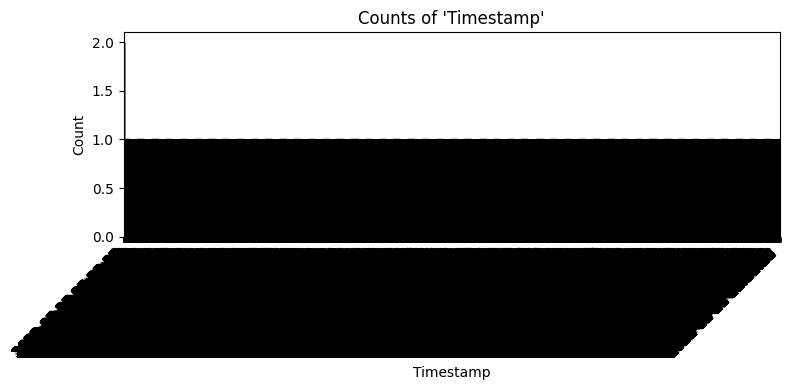

KeyboardInterrupt: 

In [15]:
cat_cols = cybersecurity_data.select_dtypes(include=["object"]).columns

# plot a bar chart of value counts for each categorical column
for col in cat_cols:
    counts = cybersecurity_data[col].value_counts(dropna=False)

    ax = counts.plot.bar(
        figsize=(8, 4),
        color="skyblue",
        edgecolor="black"
    )
    ax.set_title(f"Counts of '{col}'")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.